In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("Wholesale customers data.csv")
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [4]:
df.isnull().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [5]:
df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [6]:
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [7]:
from IPython.display import Image
from six import StringIO
from sklearn.tree import export_graphviz
import pydotplus,graphviz

In [8]:
x=df.drop('Channel',axis=1)
y=df['Channel']

In [9]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=99)
x_train.head()

,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
74,3,8190,6343,9794,1285,1901,1780
416,3,4389,10940,10908,848,6728,993
142,3,37036,7152,8253,2995,20,3
147,3,9203,3373,2707,1286,1082,526
173,3,514,7677,19805,937,9836,716


In [10]:
dt1=DecisionTreeClassifier(max_depth=5)
dt1.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5)

In [11]:
y_pred_test=dt1.predict(x_test)

In [12]:
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           1       0.93      0.95      0.94        82
           2       0.92      0.88      0.90        50

    accuracy                           0.92       132
   macro avg       0.92      0.92      0.92       132
weighted avg       0.92      0.92      0.92       132



In [13]:
print(accuracy_score(y_test,y_pred_test))
print(confusion_matrix(y_test,y_pred_test))

0.9242424242424242
[[78  4]
 [ 6 44]]


In [14]:
colname=list(df.columns[1:])
colname

['Region',
 'Fresh',
 'Milk',
 'Grocery',
 'Frozen',
 'Detergents_Paper',
 'Delicassen']

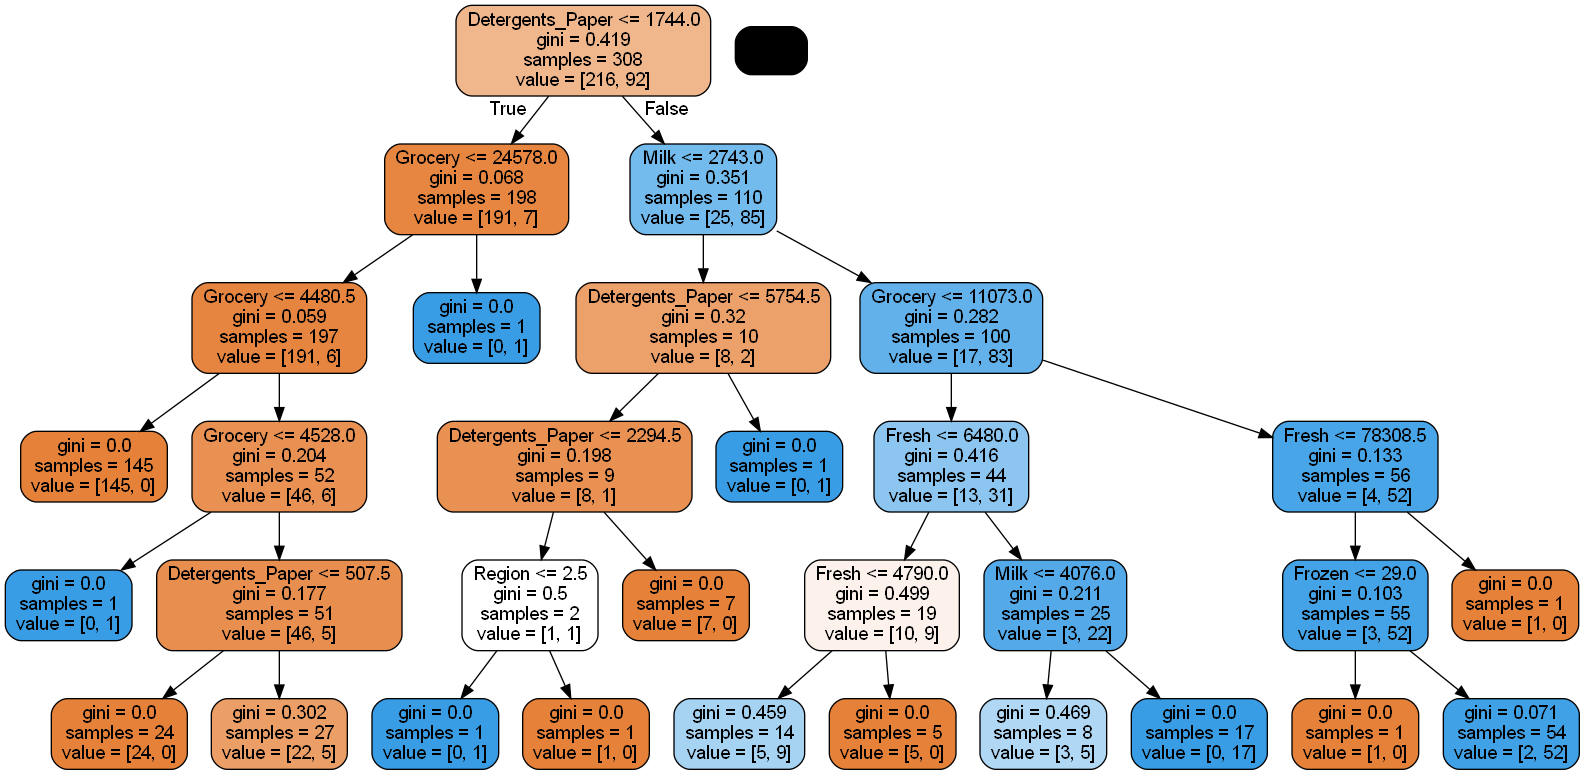

In [15]:
dot_data = StringIO()  
export_graphviz(dt1, out_file=dot_data,
                feature_names=colname, filled=True,rounded=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [16]:
from sklearn.model_selection import KFold,GridSearchCV

In [17]:
parameters={'max_depth':range(3,9,3),
           'min_samples_leaf':range(30,90,30),
           'min_samples_split':range(30,90,30),
           'criterion':['entropy','gini']}
n_folds=5
dt2=DecisionTreeClassifier()
grid_search=GridSearchCV(estimator=dt2,param_grid=parameters,cv=n_folds,verbose=1)
grid_search.fit(x_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': range(3, 9, 3),
                         'min_samples_leaf': range(30, 90, 30),
                         'min_samples_split': range(30, 90, 30)},
             verbose=1)

In [18]:
cv_results=pd.DataFrame(grid_search.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001285,6.071954e-04,0.000817,4.100521e-04,entropy,3,30,30,"{'criterion': 'entropy', 'max_depth': 3, 'min_...",0.887097,0.967742,0.935484,0.868852,0.819672,0.895769,0.051668,1
1,0.000960,9.341635e-05,0.000977,2.741083e-04,entropy,3,30,60,"{'criterion': 'entropy', 'max_depth': 3, 'min_...",0.887097,0.967742,0.935484,0.868852,0.819672,0.895769,0.051668,1
2,0.000926,1.491547e-04,0.001000,1.907349e-07,entropy,3,60,30,"{'criterion': 'entropy', 'max_depth': 3, 'min_...",0.887097,0.967742,0.935484,0.868852,0.819672,0.895769,0.051668,1
3,0.001149,2.200265e-04,0.000852,1.785870e-04,entropy,3,60,60,"{'criterion': 'entropy', 'max_depth': 3, 'min_...",0.887097,0.967742,0.935484,0.868852,0.819672,0.895769,0.051668,1
4,0.000979,4.289160e-05,0.001000,1.507891e-07,entropy,6,30,30,"{'criterion': 'entropy', 'max_depth': 6, 'min_...",0.887097,0.967742,0.935484,0.868852,0.819672,0.895769,0.051668,1
5,0.001011,2.064732e-05,0.000990,2.059937e-05,entropy,6,30,60,"{'criterion': 'entropy', 'max_depth': 6, 'min_...",0.887097,0.967742,0.935484,0.868852,0.819672,0.895769,0.051668,1
6,0.001021,4.098481e-05,0.000853,2.451110e-04,entropy,6,60,30,"{'criterion': 'entropy', 'max_depth': 6, 'min_...",0.887097,0.967742,0.935484,0.868852,0.819672,0.895769,0.051668,1
7,0.000967,6.597514e-05,0.000000,0.000000e+00,entropy,6,60,60,"{'criterion': 'entropy', 'max_depth': 6, 'min_...",0.887097,0.967742,0.935484,0.868852,0.819672,0.895769,0.051668,1
8,0.001001,6.143617e-07,0.001000,9.933790e-07,gini,3,30,30,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.887097,0.967742,0.935484,0.868852,0.819672,0.895769,0.051668,1
9,0.001000,5.001110e-07,0.000800,4.002097e-04,gini,3,30,60,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.887097,0.967742,0.935484,0.868852,0.819672,0.895769,0.051668,1


In [19]:
print("best_accuracy",grid_search.best_score_)
print(grid_search.best_estimator_)

best_accuracy 0.8957694341618192
DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=30,
                       min_samples_split=30)


In [20]:
best_dt=DecisionTreeClassifier(criterion='gini',random_state=100,max_depth=3,min_samples_leaf=30,min_samples_split=30)
best_dt.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=30, min_samples_split=30,
                       random_state=100)

In [21]:
best_dt.score(x_test,y_test)

0.9545454545454546

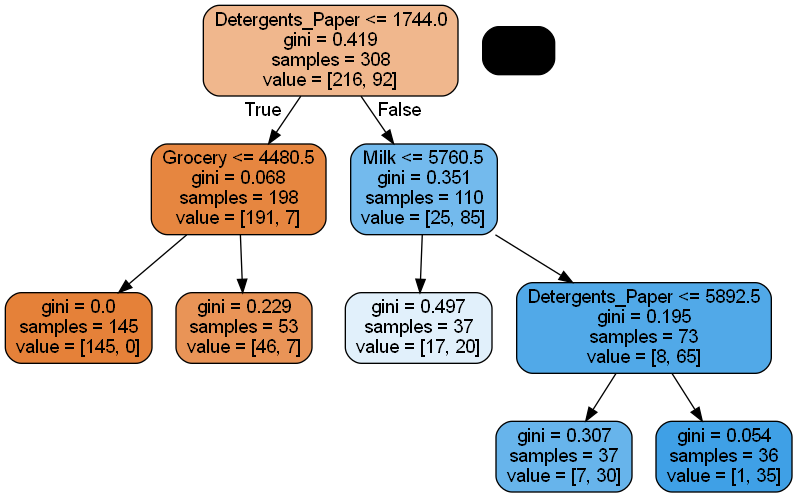

In [22]:
dot_data=StringIO()
export_graphviz(best_dt,out_file=dot_data,feature_names=colname,filled=True,rounded=True)
graph=pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [23]:
y_pred_test2=best_dt.predict(x_test)

In [24]:
print(classification_report(y_test,y_pred_test2))

              precision    recall  f1-score   support

           1       0.99      0.94      0.96        82
           2       0.91      0.98      0.94        50

    accuracy                           0.95       132
   macro avg       0.95      0.96      0.95       132
weighted avg       0.96      0.95      0.95       132



In [25]:
print(confusion_matrix(y_test,y_pred_test2))

[[77  5]
 [ 1 49]]


In [26]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()

In [27]:
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [28]:
y_pred_test_rfc=rfc.predict(x_test)

In [29]:
print(classification_report(y_test,y_pred_test_rfc))

              precision    recall  f1-score   support

           1       0.97      0.95      0.96        82
           2       0.92      0.96      0.94        50

    accuracy                           0.95       132
   macro avg       0.95      0.96      0.95       132
weighted avg       0.96      0.95      0.95       132



In [30]:
print(confusion_matrix(y_test,y_pred_test_rfc))

[[78  4]
 [ 2 48]]


In [31]:
print(accuracy_score(y_test,y_pred_test_rfc))

0.9545454545454546


In [32]:
parameters={'max_depth':[3,8,1],
           'min_samples_split':range(100,400,100),
           'min_samples_leaf':range(100,400,100),
           'n_estimators':[100,1000,150],
           'max_features':[5,10,1]}
best_rf=RandomForestClassifier()
grid_search=GridSearchCV(estimator=best_rf,param_grid=parameters,cv=3,n_jobs=-1,verbose=1,return_train_score=True)


In [33]:
grid_search.fit(x_train,y_train)

Fitting 3 folds for each of 243 candidates, totalling 729 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [3, 8, 1], 'max_features': [5, 10, 1],
                         'min_samples_leaf': range(100, 400, 100),
                         'min_samples_split': range(100, 400, 100),
                         'n_estimators': [100, 1000, 150]},
             return_train_score=True, verbose=1)

In [34]:
print("we got accuracy of",grid_search.best_score_,"using this optimal parameters",grid_search.best_params_)

we got accuracy of 0.7013135351227869 using this optimal parameters {'max_depth': 3, 'max_features': 5, 'min_samples_leaf': 100, 'min_samples_split': 100, 'n_estimators': 100}


In [35]:
best_rfc=RandomForestClassifier(bootstrap=True,
                               max_depth=3,min_samples_leaf=100,min_samples_split=100,n_estimators=100,max_features=5)
best_rfc.fit(x_train,y_train)

RandomForestClassifier(max_depth=3, max_features=5, min_samples_leaf=100,
                       min_samples_split=100)

In [36]:
y_pred_best_rfc=best_rfc.predict(x_test)

In [37]:
print(classification_report(y_test,y_pred_best_rfc),'\n',accuracy_score(y_test,y_pred_best_rfc),'\n',confusion_matrix(y_test,y_pred_best_rfc))

              precision    recall  f1-score   support

           1       0.62      1.00      0.77        82
           2       0.00      0.00      0.00        50

    accuracy                           0.62       132
   macro avg       0.31      0.50      0.38       132
weighted avg       0.39      0.62      0.48       132
 
 0.6212121212121212 
 [[82  0]
 [50  0]]


In [38]:
from sklearn.ensemble import AdaBoostClassifier

In [39]:
tree1=DecisionTreeClassifier(max_depth=3,random_state=100)

In [40]:
tree1.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3, random_state=100)

In [41]:
y_ada_pred=tree1.predict(x_test)

In [42]:
print("accuracy",accuracy_score(y_test,y_ada_pred))

accuracy 0.946969696969697


In [43]:
from sklearn import metrics
estimators=list(range(1,20,3))
ada_score=[]
for n_est in estimators:
    ADA=AdaBoostClassifier(base_estimator=tree1,n_estimators=n_est)
    ADA.fit(x_train,y_train)
    y_ada_pred2=ADA.predict(x_test)
    score=metrics.accuracy_score(y_test,y_ada_pred2)
    ada_score.append(score)

In [44]:
print(accuracy_score(y_test,y_ada_pred2))

0.9090909090909091


In [45]:
ada_score

[0.9621212121212122,
 0.9015151515151515,
 0.8787878787878788,
 0.9090909090909091,
 0.8787878787878788,
 0.8863636363636364,
 0.9090909090909091]

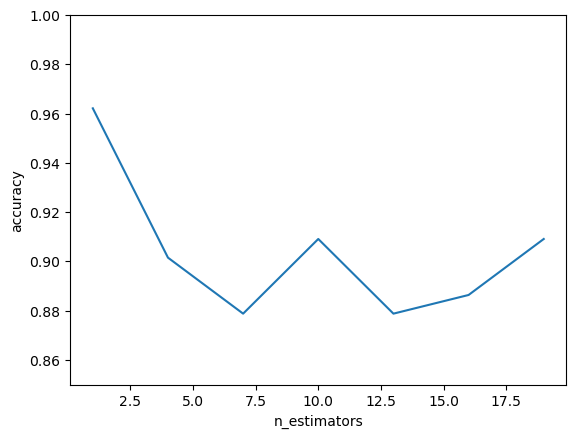

In [46]:
plt.plot(estimators,ada_score)
plt.xlabel('n_estimators')
plt.ylabel('accuracy')
plt.ylim([0.85,1])
plt.show()

In [47]:
from sklearn.ensemble import GradientBoostingClassifier

In [48]:
parameters={"learning_rate":[0.2,0.6,0.9],
           "subsample":[0.3,0.6,0.9]}
Gbooster=GradientBoostingClassifier(max_depth=2,n_estimators=200)
n_folds=3
grid_search_gbooster=GridSearchCV(Gbooster,cv=n_folds,param_grid=parameters,scoring='roc_auc',return_train_score=True,verbose=1)
grid_search_gbooster.fit(x_train,y_train)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


GridSearchCV(cv=3,
             estimator=GradientBoostingClassifier(max_depth=2,
                                                  n_estimators=200),
             param_grid={'learning_rate': [0.2, 0.6, 0.9],
                         'subsample': [0.3, 0.6, 0.9]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [49]:
cv_results=pd.DataFrame(grid_search_gbooster.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.061187,0.005324,0.002748,1.056987e-03,0.2,0.3,"{'learning_rate': 0.2, 'subsample': 0.3}",0.957885,0.951165,0.862500,0.923850,0.043468,6,1.000000,1.000000,0.967854,0.989285,1.515380e-02
1,0.068271,0.002248,0.001838,2.296722e-04,0.2,0.6,"{'learning_rate': 0.2, 'subsample': 0.6}",0.974910,0.947581,0.862963,0.928485,0.047655,2,1.000000,1.000000,1.000000,1.000000,6.409876e-17
2,0.074163,0.000463,0.002009,1.129913e-05,0.2,0.9,"{'learning_rate': 0.2, 'subsample': 0.9}",0.973566,0.958333,0.871759,0.934553,0.044835,1,1.000000,1.000000,1.000000,1.000000,0.000000e+00
3,0.063851,0.002342,0.002069,9.665677e-05,0.6,0.3,"{'learning_rate': 0.6, 'subsample': 0.3}",0.257616,0.810036,0.432870,0.500174,0.230491,9,0.511384,0.813866,0.240815,0.522022,2.340679e-01
4,0.065746,0.000757,0.002157,2.198952e-04,0.6,0.6,"{'learning_rate': 0.6, 'subsample': 0.6}",0.963710,0.956989,0.861574,0.927424,0.046644,3,1.000000,1.000000,1.000000,1.000000,0.000000e+00
5,0.074914,0.000458,0.002001,1.123916e-07,0.6,0.9,"{'learning_rate': 0.6, 'subsample': 0.9}",0.972670,0.933244,0.873611,0.926508,0.040720,4,1.000000,1.000000,1.000000,1.000000,0.000000e+00
6,0.062388,0.001930,0.001822,2.232910e-04,0.9,0.3,"{'learning_rate': 0.9, 'subsample': 0.3}",0.724014,0.591846,0.830093,0.715318,0.097458,8,0.727801,0.747382,0.898241,0.791141,7.615207e-02
7,0.071721,0.001718,0.002001,2.973602e-07,0.9,0.6,"{'learning_rate': 0.9, 'subsample': 0.6}",0.910842,0.954749,0.830324,0.898638,0.051524,7,0.993511,1.000000,0.984207,0.992573,6.481517e-03
8,0.070802,0.005092,0.001599,4.316111e-04,0.9,0.9,"{'learning_rate': 0.9, 'subsample': 0.9}",0.965054,0.941308,0.868519,0.924960,0.041071,5,1.000000,1.000000,1.000000,1.000000,0.000000e+00


In [50]:
print("accuracy of gradient booster=",grid_search_gbooster.best_score_,"using optimal parameters=",grid_search_gbooster.best_params_)

accuracy of gradient booster= 0.9345529669454401 using optimal parameters= {'learning_rate': 0.2, 'subsample': 0.9}


In [ ]:
######  Assignment 5 complete   #######